# Problem 5

In [4]:
import cvxpy
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel 

class MySVR(BaseEstimator, RegressorMixin):
    def __init__(self , kernel = 'rbf', C = 1.0, epsilon = 0.1, gamma = 1.0, p = 1):
        self.kernel = kernel
        self.C = C
        self.epsilon = epsilon
        self.gamma = gamma
        self.p = p
        
    def fit(self, X, y):
        n = y.size
            
        if X.shape[0] != n:
            raise Exception('Dimantions of X and y should match')
            
        self.X = X
            
        if self.kernel == 'linear':
            self.K = linear_kernel
        elif self.kernel == 'polynomial':
            self.K = lambda X, Y = None: polynomial_kernel(X, Y, degree = self.p)
        elif self.kernel == 'rbf':
            self.K = lambda X, Y = None: rbf_kernel(X, Y, gamma = self.gamma)
            
        k = self.K(X)
        
        l = cvxpy.Variable(n)
        m = cvxpy.Variable(n)
        
        objective = cvxpy.Maximize(-0.5 * cvxpy.quad_form(m - l, k) +\
                                   y.reshape(1, -1) * (m - l) -\
                                   self.epsilon * cvxpy.sum_entries(m + l))
        constraints = [l >= 0, m >= 0, l + m <= self.C / n]
        
        problem = cvxpy.Problem(objective, constraints)
        problem.solve()
        
        self.L = l.value
        self.M = m.value
    
    def predict(self, X_new):
        return self.K(X_new, self.X).dot(self.M - self.L)

# Problem 6

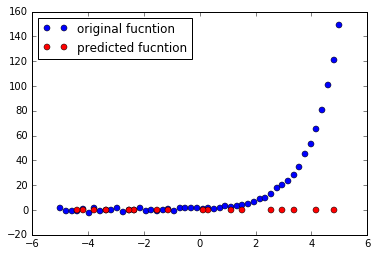

In [216]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

np.random.seed(1)
x = np.linspace(-5, 5).reshape(-1, 1)
y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svr = MySVR()
svr.fit(X_train, y_train)
y_predicted = svr.predict(X_test)

plt.plot(x, y, 'bo', label='original fucntion')
plt.plot(X_test, y_predicted, 'ro', label='predicted fucntion')
plt.legend(loc='best')

# Problem 7

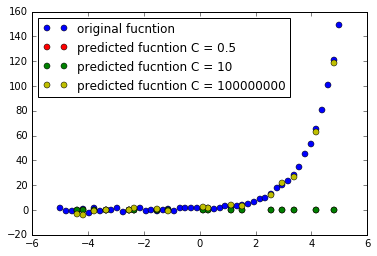

In [193]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

np.random.seed(1)
x = np.linspace(-5, 5).reshape(-1, 1)
y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svr1 = MySVR(C = 0.5)
svr1.fit(X_train, y_train)
y_predicted1 = svr1.predict(X_test)

svr2 = MySVR(C = 10)
svr2.fit(X_train, y_train)
y_predicted2 = svr2.predict(X_test)

svr3 = MySVR(C = 100000000)
svr3.fit(X_train, y_train)
y_predicted3 = svr3.predict(X_test)

plt.plot(x, y, 'bo', label='original fucntion')
plt.plot(X_test, y_predicted1, 'ro', label = 'predicted fucntion C = 0.5')
plt.plot(X_test, y_predicted2, 'go', label = 'predicted fucntion C = 10')
plt.plot(X_test, y_predicted3, 'yo', label = 'predicted fucntion C = 100000000')
plt.legend(loc='best')

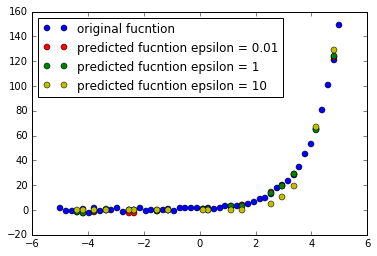

In [195]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

np.random.seed(1)
x = np.linspace(-5, 5).reshape(-1, 1)
y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svr1 = MySVR(epsilon = 0.01, C = 10000)
svr1.fit(X_train, y_train)
y_predicted1 = svr1.predict(X_test)

svr2 = MySVR(epsilon = 1, C = 10000)
svr2.fit(X_train, y_train)
y_predicted2 = svr2.predict(X_test)

svr3 = MySVR(epsilon = 10, C = 10000)
svr3.fit(X_train, y_train)
y_predicted3 = svr3.predict(X_test)

plt.plot(x, y, 'bo', label='original fucntion')
plt.plot(X_test, y_predicted1, 'ro', label = 'predicted fucntion epsilon = 0.01')
plt.plot(X_test, y_predicted2, 'go', label = 'predicted fucntion epsilon = 1')
plt.plot(X_test, y_predicted3, 'yo', label = 'predicted fucntion epsilon = 10')
plt.legend(loc='best')

# Problem 8

In [7]:
from sklearn import cross_validation
import numpy as np
from sklearn.cross_validation import train_test_split

x = np.linspace(-5, 5).reshape(-1, 1)
y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svr1 = MySVR(epsilon = 0.01, C = 10000)
svr1.fit(X_train, y_train)
y_predicted1 = svr1.predict(X_test)

svr2 = MySVR(epsilon = 1, C = 10000)
svr2.fit(X_train, y_train)
y_predicted2 = svr2.predict(X_test)

svr3 = MySVR(epsilon = 10, C = 10000)
svr3.fit(X_train, y_train)
y_predicted3 = svr3.predict(X_test)

scores = cross_validation.cross_val_score(svr1, x, y, cv = 5)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_validation.cross_val_score(svr2, x, y, cv = 5)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_validation.cross_val_score(svr3, x, y, cv = 5)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2: -29.65 (+/- 98.47)
R2: -5.61 (+/- 13.03)
R2: -0.80 (+/- 2.25)


We can see that the last parameters set gives the best R2.

# Problem 9

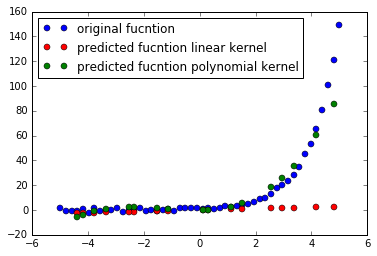

In [207]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

np.random.seed(1)
x = np.linspace(-5, 5).reshape(-1, 1)
y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svr1 = MySVR(kernel = 'linear')
svr1.fit(X_train, y_train)
y_predicted1 = svr1.predict(X_test)

svr2 = MySVR(kernel = 'polynomial', p = 3)
svr2.fit(X_train, y_train)
y_predicted2 = svr2.predict(X_test)

plt.plot(x, y, 'bo', label='original fucntion')
plt.plot(X_test, y_predicted1, 'ro', label='predicted fucntion linear kernel')
plt.plot(X_test, y_predicted2, 'go', label='predicted fucntion polynomial kernel')
plt.legend(loc='best')

We can see that linear kernel shows bad result. And polynomial is not very accurate.

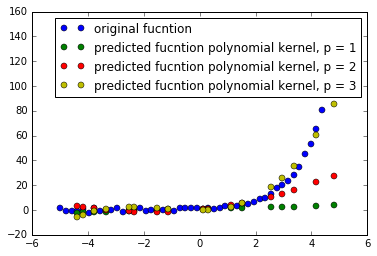

In [209]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

np.random.seed(1)
x = np.linspace(-5, 5).reshape(-1, 1)
y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svr1 = MySVR(kernel = 'polynomial', p = 1)
svr1.fit(X_train, y_train)
y_predicted1 = svr1.predict(X_test)

svr2 = MySVR(kernel = 'polynomial', p = 2)
svr2.fit(X_train, y_train)
y_predicted2 = svr2.predict(X_test)

svr3 = MySVR(kernel = 'polynomial', p = 3)
svr3.fit(X_train, y_train)
y_predicted3 = svr3.predict(X_test)

plt.plot(x, y, 'bo', label='original fucntion')
plt.plot(X_test, y_predicted1, 'go', label='predicted fucntion polynomial kernel, p = 1')
plt.plot(X_test, y_predicted2, 'ro', label='predicted fucntion polynomial kernel, p = 2')
plt.plot(X_test, y_predicted3, 'yo', label='predicted fucntion polynomial kernel, p = 3')
plt.legend(loc='best')

We can see, that higher degrees of polynomial kernel gives better prediction result

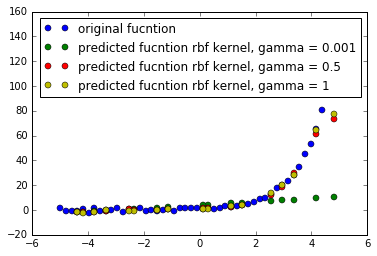

In [220]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

np.random.seed(1)
x = np.linspace(-5, 5).reshape(-1, 1)
y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svr1 = MySVR(kernel = 'rbf', gamma = 0.001, C = 1000)
svr1.fit(X_train, y_train)
y_predicted1 = svr1.predict(X_test)

svr2 = MySVR(kernel = 'rbf', gamma = 0.5, C = 1000)
svr2.fit(X_train, y_train)
y_predicted2 = svr2.predict(X_test)

svr3 = MySVR(kernel = 'rbf', gamma = 1, C = 1000)
svr3.fit(X_train, y_train)
y_predicted3 = svr3.predict(X_test)

plt.plot(x, y, 'bo', label='original fucntion')
plt.plot(X_test, y_predicted1, 'go', label='predicted fucntion rbf kernel, gamma = 0.001')
plt.plot(X_test, y_predicted2, 'ro', label='predicted fucntion rbf kernel, gamma = 0.5')
plt.plot(X_test, y_predicted3, 'yo', label='predicted fucntion rbf kernel, gamma = 1')
plt.legend(loc='best')

We can see that gigher gamma shows better prediction

# Problem 10

In [33]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

N = [10, 50, 100, 200, 500]

my_time = []
my_scores = []
svr_time = []
svr_scores = []

for n in N:
    x = np.linspace(-5, 5, n).reshape(-1, 1)
    y = (np.exp(x).T + np.random.normal(0, 1, x.shape[0])).T
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

    svr1 = MySVR(kernel = 'rbf', gamma = 0.001, C = 1000)
    time1 = %timeit -o svr1.fit(X_train, y_train)
    my_time.append(time1.best)
    my_scores.append(mean_squared_error(svr1.predict(X_test), y_test))
    
    svr2 = SVR(kernel = 'rbf', gamma = 0.001, C = 1000)
    time2 = %timeit -o svr2.fit(X_train, y_train.ravel())
    svr_time.append(time2.best)
    svr_scores.append(mean_squared_error(svr2.predict(X_test), y_test))

100 loops, best of 3: 8.33 ms per loop
10000 loops, best of 3: 124 µs per loop
100 loops, best of 3: 9.78 ms per loop
1000 loops, best of 3: 402 µs per loop
100 loops, best of 3: 12.8 ms per loop
1000 loops, best of 3: 1.05 ms per loop
10 loops, best of 3: 27.5 ms per loop
100 loops, best of 3: 3.79 ms per loop
10 loops, best of 3: 49.3 ms per loop
10 loops, best of 3: 21.8 ms per loop


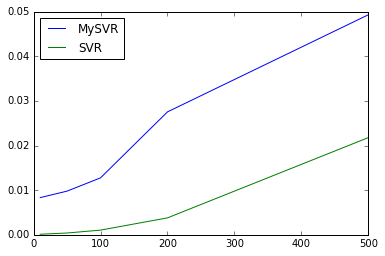

In [37]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(N, my_time, label = 'MySVR')
plt.plot(N, svr_time, label = 'SVR')
plt.legend(loc = 'best')

plt.show()

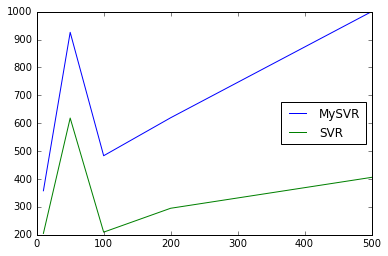

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(N, my_scores, label = 'MySVR')
plt.plot(N, svr_scores, label = 'SVR')
plt.legend(loc = 'best')

plt.show()

# Problem 11

In [10]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.kernel_ridge import KernelRidge

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.33, random_state = 42)

svr1 = MySVR(epsilon = 0.01, C = 10000)
svr1.fit(X_train, y_train)
score1 = svr1.score(X_test, y_test)

print('MySVR score {0}'.format(score1))

krr = KernelRidge(kernel = 'rbf', alpha = 0.1, gamma = 10)
krr.fit(X_train, y_train)
score2 = krr.score(X_test, y_test)

print('KRR score {}'.format(score2))

MySVR score -6.08337824552
KRR score -6.16663158754


We can see that R2 is similar